<img src='images/header.png' style='height: 50px; float: left'>

## Introduction to Computational Social Science methods with Python

# Session D1. Micro-level network analysis and community detection

In [Session C1. Network construction and visualization]() and [Session C2. Multilayer and multimodal network construction](), we have encountered networks as methodological vehicles for relational thinking. Networks are both a language to talk about things that are somehow connected and a theory that explains how social formations function in connected ways. The two network construction sessions in section C strongly leaned towards the first aspect, and we have seen that graph theory is that formal language. Here, in the analytical section D, we will dive more deeply into the theory behind relational methods and what it means to think relationally.

|<img src='images/levels.png' style='float: right; width: 480px'>|
|:--|
|<em style='float: center'>**Figure 1**: Levels in network analysis</em>|

The study of connectivity has been pioneered in the field of [Social Network Analysis](https://en.wikipedia.org/wiki/Social_network_analysis) (SNA). Basic analytic methods have been developed almost 100 years ago. It thrived because it succeeded in combining the use of empirical data, visualizations, and mathematical/computational modeling (Freeman, 2004). Work in SNA was mostly focused on the **micro-level analysis**, which means, on the analysis of nodes and how they are positioned in the network. Typically, nodes would be persons because social networks (as opposed to cultural networks) are directly observable. **Centrality analysis** is the prime example of micro-level analysis. A centrality index assigns a number to the nodes that solely depends on the structure of the network and not on any attributes the nodes may have (Menczer *et al.*, 2020, ch. 3.1; McLevey, 2022, ch. 15). A great number of centrality algorithms has been developed by now, but basically they all belong to one of three families (Borgatti & Everett, 2006). ***Figure 1*** depicts this case of analysis in the left panel where only one node and its edges are highlighted.

Another type of node-level analysis relates to the theoretical notion of the **strength of weak ties** coined by Granovetter (1973). On the one hand, persons typically form closed groups constituted by strong ties (frequently repeated and emotionally intense social relations). Network **closure** is the existence of such social groups. A fully connected group with just two ties to the outside world is highlighted in the middle panel of *figure 1*. Granovetter found that strong ties in closed networks are rarely the source of innovation and novelty because groups are typically homogeneous in terms of resources or information. If you are looking for a job, the helpful hint will likely not come from a friend you talk to every day but rather from someone who you have not talked to for a long time. The latter social relations are called weak ties, and those can be "strong" regarding resources or information. Research in economic sociology departs from this idea and proposes that **brokerage**, the bridging between closed groups, can be used with intention to achieve better outcomes (https://doi.org/10.1146/annurev-soc-081309-150054). The middle panel in *figure 1* shows four bridging ties.

SNA established as a field when it transcended micro-level analysis and devoted itself to [blockmodeling](https://en.wikipedia.org/wiki/Blockmodeling) methods that identify higher-level network structure. The **blockmodel** algorithm that changed the game for SNA identifies nodes that have similar patterns of connections to other nodes and groups similarly positioned nodes (*i.e.*, "structurally equivalent" nodes) together into building blocks. Such building blocks can be the manifest closed groups discussed above. But building blocks can also be latent: they can also consist of nodes that are not at all connected among themselves but only to nodes of another or other building blocks (Menczer 6.3.4 and McLevey 30 on SBM).

The field of SNA experienced major change when large network datasets became available around the turn of the century and physicists and computer scientists established the field of [Network Science](https://en.wikipedia.org/wiki/Network_science) (NS). NS is not only interested in social networks but in complex networks that represent complex systems in nature, society, and technology. Under the umbrella term of **meso-level analysis**, NS shifted the focus from blockmodeling to **community detection**, which means, sorting the nodes of a network into clusters that tend to be closed groups connected via bridges (Menczer *et al.*, 2020, ch. 6; McLevey, 2022, ch. 14). Besides community detection, NS focuses on [Macro-level network analysis and network modeling]() which we will address in [Session D2]().

<div class='alert alert-block alert-success'>
<b>In this session</b>, 

you will learn how to perform micro- and meso-level network analysis. We will continue to use the NetworkX package and the networks from the Copenhagen Networks Study constructed in section B. In subsession **D1.1**, we will demonstrate the "big 3" algorithms of centrality analysis. We will get to know basic graph-theoretical concepts to define them, and we will use variants of a social communication network to see how that effects centrality scores. Subsession **D1.2** is dedicated to closure and brokerage and how two scores from that area relate to centrality indices. Finally, in subsession **D1.3**, you will learn to handle two main community detection algorithms and the pitfalls and options that come with their use. Throughout the session, we will encounter multilayer networks both as a way to store data and as a representation of the social world.
</div>

## D1.1. Micro-level analysis

We work with the networks constructed in section C. Nodes are university students that participated in the Copenhagen Networks Study. `G`, `D`, `MG`, and `MD` encode Graphs, DiGraphs, MultiGraphs, and MultiDiGraphs, respectively. `fb` is the largest connected component (LCC, visit [Session C1]() for a definition of components) of the Facebook friendship network, `communication` is the LCC of the network of text messages and phone calls (each type of tie stored in its own layer) in the first week, and `bt` is the LCC of the face-to-face interaction network with four layers representing consequtive snapshots between 09:00 and 15:30 on day 2 measured via physical proximity:

In [1]:
import pickle

with open('../data/CNS/G_cns_fb_lcc.pickle', 'rb') as f:
    G_fb = pickle.load(f)
with open('../data/CNS/MD_cns_communication_week1_lcc.pickle', 'rb') as f:
    MD_communication = pickle.load(f)
with open('../data/CNS/D_cns_communication_week1_lcc.pickle', 'rb') as f:
    D_communication = pickle.load(f)
with open('../data/CNS/MG_cns_communication_week1_lcc.pickle', 'rb') as f:
    MG_communication = pickle.load(f)
with open('../data/CNS/G_cns_communication_week1_lcc.pickle', 'rb') as f:
    G_communication = pickle.load(f)
with open('../data/CNS/MG_cns_bt_f2f_p_lcc.pickle', 'rb') as f:
    MG_bt = pickle.load(f)
#with open('../data/CNS/G_cns_bt_f2f_p_lcc.pickle', 'rb') as f:
#    G_bt = pickle.load(f)

For later use, we create tables in which we store node indices:

In [2]:
import pandas as pd

nodelist_fb = pd.DataFrame(index=G_fb.nodes())
nodelist_communication = pd.DataFrame(index=G_communication.nodes())
nodelist_bt = pd.DataFrame(index=MG_bt.nodes())

### D1.1.1. Centrality analysis

To define centrality indices and understand how we can use them, we need to learn more concepts in the relational language of graph theory and we need to make two points. Let us make a small graph-theoretical exercise by looking at node `v = 4` and its four [neighbors()](https://networkx.org/documentation/networkx-2.8.4/reference/classes/generated/networkx.Graph.neighbors.html) in the comunication network:

In [3]:
import networkx as nx
nx.__version__

'2.8.4'

In [4]:
v = 4
[node for node in nx.neighbors(G=G_communication, n=v)]

[221, 266, 344, 424]

These are the four classes of subgraphs constituted by the five nodes:

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

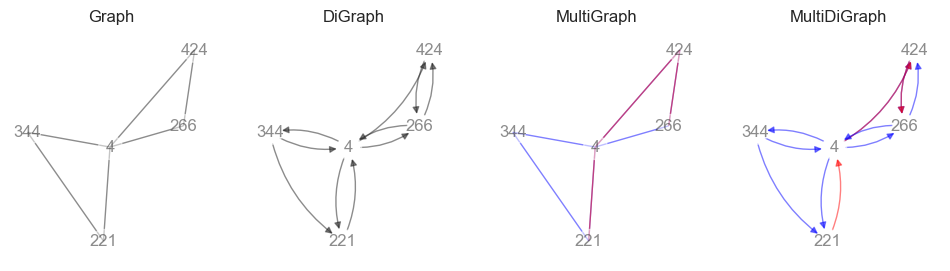

In [6]:
networks = [G_communication.subgraph(nodes=[4, 221, 266, 344, 424]), D_communication.subgraph(nodes=[4, 221, 266, 344, 424]), MG_communication.subgraph(nodes=[4, 221, 266, 344, 424]), MD_communication.subgraph(nodes=[4, 221, 266, 344, 424])]
edge_colors = [None, None, [key for u, v, key in MG_communication.subgraph(nodes=[4, 221, 266, 344, 424]).edges.keys()], [key for u, v, key in MD_communication.subgraph(nodes=[4, 221, 266, 344, 424]).edges.keys()]]
titles = ['Graph', 'DiGraph', 'MultiGraph', 'MultiDiGraph']

fig, axs = plt.subplots(1, 4, figsize=(12, 3))
for i in range(4):
    axs[i].set_title(titles[i])
    nx.draw(
        G = networks[i], 
        pos = nx.get_node_attributes(G=networks[i], name='pos'), 
        with_labels = True, 
        ax = axs[i], 
        node_color = 'white', 
        alpha = .5, 
        edge_color = edge_colors[i], 
        cmap = plt.cm.rainbow, 
        edge_cmap = plt.cm.bwr, 
        connectionstyle = 'arc3, rad=0.2'
    )

A **walk** on a network is a sequency of nodes and edges that starts and ends with a node. For example, in the Graph (left panel), 4 → 221 → 344 → 4 → 221 would be a walk of length 4 (it involves four edges). In walks, nodes and edges can be visited multiple times. Now look at the DiGraph: the same walk is not possible because there is no directed edge from 221 to 344. In the MultiGraph, the walker has the choide to walk from 4 to 221 using a blue edge (text messages) or a red edge (phone calls) – the two edges overlap and show as one purple edge due to NetworkX's difficulty to plot parallel edges in multilayer networks. In the MultiDiGraph, a walk 4 → 344 → 221 → 4 is only possible when both layers are combined.

The first point from this exercise is that the way you construct your network is consequential for the results you get. We can see this if we simply count the number of edges that a node has to its neighbors. This number is called the **degree** of a node. When edge direction is taken into account, in-degree (out-degree) counts the number of incoming (outgoing) edges:

In [7]:
print('Graph:        degree     =', G_communication.degree()[v])
print('DiGraph:      in-degree  =', D_communication.in_degree()[v])
print('DiGraph:      out-degree =', D_communication.out_degree()[v])
print('MultiGraph:   degree     =', MG_communication.degree()[v])
print('MultiDiGraph: in-degree  =', MD_communication.in_degree()[v])
print('MultiDiGraph: out-degree =', MD_communication.out_degree()[v])

Graph:        degree     = 4
DiGraph:      in-degree  = 3
DiGraph:      out-degree = 4
MultiGraph:   degree     = 6
MultiDiGraph: in-degree  = 3
MultiDiGraph: out-degree = 5


The answer to the question **which network to analyze** originates in your research design. In our example, edges in the blue layer represent text messages and in the red layer phone calls. If you are interested who has communicated with whom, you can discard the layer information. But if you want to know how versed a student is in playing the different communication channels, you may want to keep it. Similarly for network direction: in network analysis, we are often interested in how things travel or flow in a network and if nodes can be reached. For example, if you want to reconstruct who has initiated most communication flows among the students, then you will want to keep the direction of the edges.

The second point from our little exercise is that you should consciously construct your networks based on your research design. As we will shortly see, the same applies to the choice of methods (McLevey, 2022, ch. 13.6). Degrees can also be weighted, which means, when counting a node's number of edges their weight is taken into account. The way these weights are constructed is yet another decision that affects the outcome of your analysis:

In [8]:
print('Graph:        degree     =', G_communication.degree(weight='weight')[v])
print('DiGraph:      in-degree  =', D_communication.in_degree(weight='weight')[v])
print('DiGraph:      out-degree =', D_communication.out_degree(weight='weight')[v])
print('MultiGraph:   degree     =', MG_communication.degree(weight='weight')[v])
print('MultiDiGraph: in-degree  =', MD_communication.in_degree(weight='weight')[v])
print('MultiDiGraph: out-degree =', MD_communication.out_degree(weight='weight')[v])

Graph:        degree     = 8.848592523524871
DiGraph:      in-degree  = 7.804185610279881
DiGraph:      out-degree = 8.2909394454419
MultiGraph:   degree     = 10.147171998381003
MultiDiGraph: in-degree  = 7.804185610279881
MultiDiGraph: out-degree = 9.892999436769863


More graph-theoretical concepts are needed to get a proper understanding of centrality indices and networks in general. A **path** is a walk in which nodes are only permitted to be visited once. 424 → 266 → 4 → 344 → 221 is a path of length 4 from 424 to 221 in the Digraph above. However, it is not the **shortest path**, which is 424 → 4 → 221 (length 2). The **distance** of a node from another node is the length of the shortest path connecting them. The distance of 221 from node 424 is 2. However, the distance of 424 from node 221 is 3. Direction matters (McLevey, 2022, chs. 13.6 and 15.5). Can you see why?

<div class='alert alert-block alert-info'>
<big><b>Insight: Distance</b></big>

We are conditioned to think of distance in geographic terms, measured in terms of meters. Relational thinking means to think of shortest paths instead. Brockmann \& Helbing (2006) have succeeded in demonstrating this paradigmatic shift by directly comparing relational and geographic distance. "The [clip](https://www.youtube.com/watch?v=YgXouSdgHj4) depicts the time course of a simulated pandemic with initial outbreak in Atlanta, USA. The panels on the left and right depict the same simulation, only in different representations. On the left one observes a concentric, expanding wave front in the effective distance representation. The same simulation exhibits more complex spatio-temporal structure in the conventional geographic representation on the right." ([Source](https://www.science.org/doi/suppl/10.1126/science.1245200/suppl_file/brockmann.sm.pdf))
</div>

In the remainder and for the sake of simplicity, we will only demonstrate centrality analysis for the undirected and unlayered communication network.

#### Degree centrality

The first index of the "big 3" is degree centrality $d$, the degree of a node $v$ divided by the possible number of neighbors. It is defined as

$d_v=\frac{k_v}{n-1}$.

where $k_v$ is the number of $v$'s edges and $n$ is the number of nodes in the network. Degree centrality is a very basic metric that measures pure volumes (*e.g.*, popularity or influence) (McLevey, 2022, ch. 15.7). Using the concepts defined above, a centrality index quantifies a node's involvement in a given set of walks. Degree centrality counts the number of walks that **start or end at** node $v$ and cover a distance of 1 from $v$ (Borgatti & Everett, 2006).

The [`degree_centrality()`](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html) function can take all graph classes as input (also directed any layered networks), so be careful how you use it:

In [9]:
degree_communication = nx.degree_centrality(G_communication)

The function returns a dictionary with nodes as keys and centralities as values. Store the values in the table prepared above...

In [10]:
nodelist_communication['degree'] = degree_communication.values()

and plot the network with degree centrality as node size:

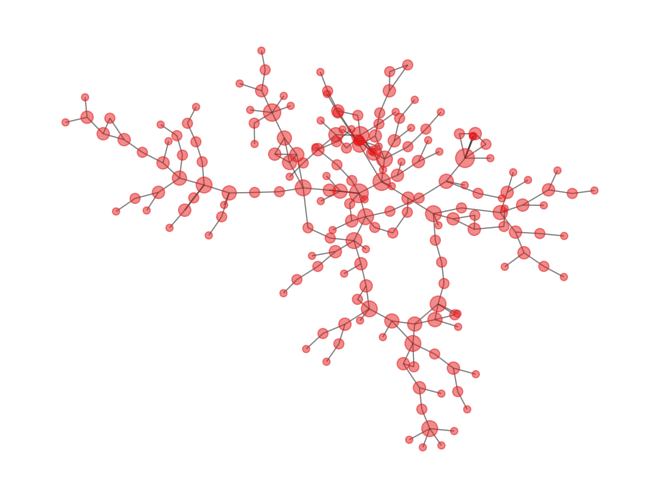

In [11]:
nx.draw(
    G = G_communication, 
    pos = nx.get_node_attributes(G=G_communication, name='pos'), 
    node_size = [5000*k for k in nodelist_communication['degree']], 
    node_color = '#e41a1c', 
    alpha = .5
)

Use the [`in_degree_centrality()`](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.centrality.in_degree_centrality.html) and [`out_degree_centrality()`](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.centrality.out_degree_centrality.html) functions if direction matters:

In [12]:
#in_degree_communication = nx.in_degree_centrality(D_communication)
#out_degree_communication = nx.out_degree_centrality(D_communication)

#nodelist_communication['in_degree'] = in_degree_communication.values()
#nodelist_communication['out_degree'] = out_degree_communication.values()

#### Closeness centrality

This is the second index of the "big 3". Closeness centrality is based on the notion that central nodes are close to other nodes. Use closeness centrality if you want to measure a node's potential independence or efficiency. The concept of distance is key. To get the gist of it, consider the following subgraph of the communication network, now extended to include the neighbors' neighbors of node 4:

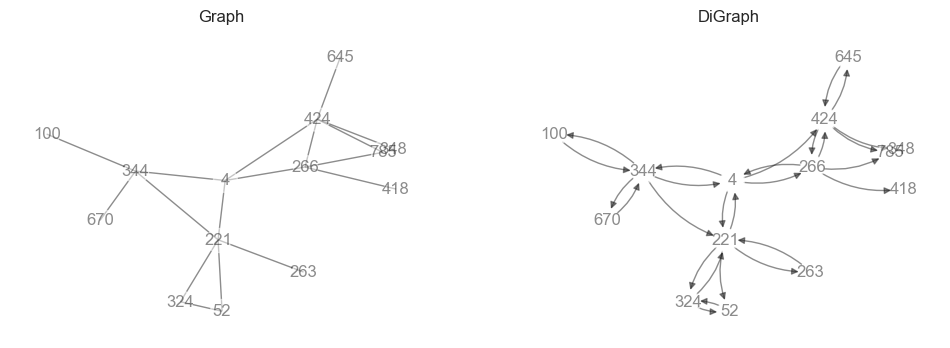

In [13]:
networks = [G_communication.subgraph(nodes=[4, 52, 100, 221, 263, 266, 324, 344, 348, 418, 424, 645, 670, 785]), D_communication.subgraph(nodes=[4, 52, 100, 221, 263, 266, 324, 344, 348, 418, 424, 645, 670, 785])]
titles = ['Graph', 'DiGraph']

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
for i in range(2):
    axs[i].set_title(titles[i])
    nx.draw(
        G = networks[i], 
        pos = nx.get_node_attributes(G=networks[i], name='pos'), 
        with_labels = True, 
        ax = axs[i], 
        node_color = 'white', 
        alpha = .5, 
        connectionstyle = 'arc3, rad=0.2'
    )

In the left panel, node 4 has four immediate neighbors (distance 1) and nine nodes at distance 2. Node 4 is closest to all others simply because the network has been constructed by expanding from that node. Node 100, on the other hand, is far away from the other nodes. It only has one neighbor, three neighbors of neighbors, ..., and even three nodes at distance 4. Node 100 is not close to all other nodes. Now look at the right panel. In the directed network, three nodes (348, 418, and 785) are not in the same weakly-connected component (visit [Session C1]() for a definition of components) as node 4 because no edge points away from them. Graph-theoretically, those nodes are unreachable or infinitely far away. These nodes will not be considered in by NetworkX's algorithm when it computes the closeness centrality of node 4.

Mathematically, the closeness centrality $c$ of node $v$ is defined as

$c_v=\frac{n-1}{\sum\limits_{u\neq v}d(v,u)}$

where $d(v,u)$ is the distance of a node $u$ from node $v$ and the sum extends over all nodes that belong to the same component as $v$. In words, the algorithm computes the distances of all nodes in the same component and sums them up. This number will be large if all other nodes are far away from $v$. Then the algorithm takes the reciprocal of this number which will now be small if all other nodes are far away from $v$. Finally, the number is normalized by multiplying it with the number of reachable nodes in the component. Like degree centrality, closeness centrality counts the number of walks that start or end at node $v$. But unlike degree centrality, it considers the length of the walks (Borgatti & Everett, 2006).

The [`closeness_centrality()`](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html) algorithm accepts any of the four graph classes as input. For undirected graphs, no particular care in applying the method is required. When the network is directed, the algorithm computes **inward closeness** (*i.e.*, distances are computed by analyzing the shortest paths that terminate in vertex $v$). To measure **outward closeness**, you must [`reverse()`](https://networkx.org/documentation/networkx-2.8.4/reference/classes/generated/networkx.DiGraph.reverse.html) the directions of the edges:

In [14]:
closeness_communication = nx.closeness_centrality(G_communication)
#in_closeness_communication = nx.closeness_centrality(D_communication)
#out_closeness_communication = nx.closeness_centrality(D_communication.reverse())

nodelist_communication['closeness'] = closeness_communication.values()
#nodelist_communication['in_closeness'] = in_closeness_communication.values()
#nodelist_communication['out_closeness'] = out_closeness_communication.values()

The plot confirms that nodes in the periphery have smaller closeness centrality scores than nodes in the core:

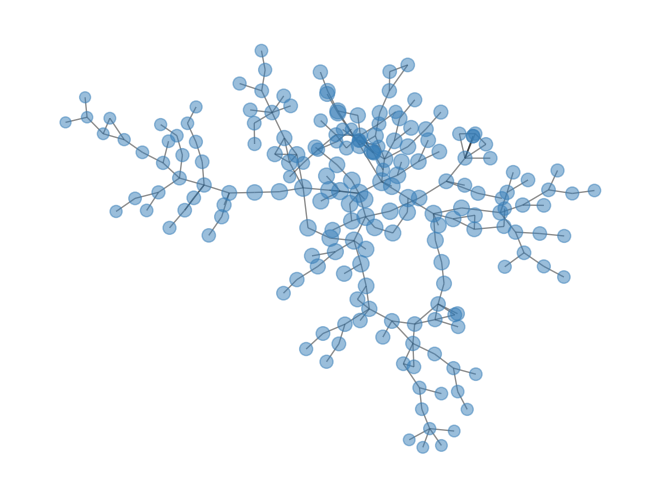

In [15]:
nx.draw(
    G = G_communication, 
    pos = nx.get_node_attributes(G=G_communication, name='pos'), 
    node_size = [1000*k for k in nodelist_communication['closeness']], 
    node_color = '#377eb8', 
    alpha = .5
)

How can edge weights be utilized? The idea is that weights are considered as costs in the shortest path calculation. According to this idea, a node $u$ can be closer to $v$ when it is connected at large distance but via strong ties than when it is connected at short distance but via weak ties. The least costly path connecting two nodes is then the shortest path between them.

In our communication, the edge attribute `weight` is a measure of the logged number of text messages or phone calls, a measure of strength. Since the [`closeness_centrality()`](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html) function requires an edge attribute that is a distance measure, we construct a new `distance` edge attribute that is the reciprocal of `weight`:

In [16]:
for u, v, data in G_communication.edges(data=True):
    data['distance'] = 1 / data['weight']

for u, v, data in D_communication.edges(data=True):
    data['distance'] = 1 / data['weight']

In [17]:
#weighted_closeness_communication = nx.closeness_centrality(G=G_communication, distance='distance')
#weighted_in_closeness_communication = nx.closeness_centrality(G=D_communication, distance='distance')
#weighted_out_closeness_communication = nx.closeness_centrality(G=D_communication.reverse(), distance='distance')

#nodelist_communication['weighted_closeness'] = weighted_closeness_communication.values()
#nodelist_communication['weighted_in_closeness'] = weighted_in_closeness_communication.values()
#nodelist_communication['weighted_out_closeness'] = weighted_out_closeness_communication.values()

#### Betweenness centrality

Betweenness centrality is the third of the "big 3" centrality indices. For this index, shortest paths are important again, but in a different way. While closeness centrality considers the length of the shortest paths that start or end at node $v$, betweenness centrality considers the number of shortest paths that **pass through** $v$ (Borgatti & Everett, 2006). A plot shall help us understand the concept:

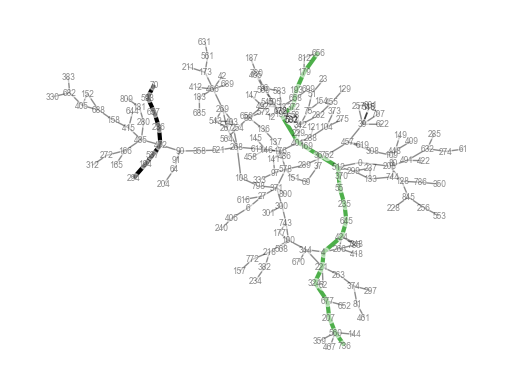

In [18]:
nx.draw_networkx_nodes(
    G = G_communication, 
    pos = nx.get_node_attributes(G=G_communication, name='pos'), 
    node_size = 50, 
    node_color = 'white', 
    alpha = .5
)
nx.draw_networkx_labels(
    G = G_communication, 
    pos = nx.get_node_attributes(G=G_communication, name='pos'), 
    font_size = 6, 
    alpha = .5
)
nx.draw_networkx_edges(
    G = G_communication, 
    pos = nx.get_node_attributes(G=G_communication, name='pos'), 
    alpha = .5
)
nx.draw_networkx_edges(
    G = G_communication.subgraph(nx.shortest_path(G=G_communication, source=656, target=736)), 
    pos = nx.get_node_attributes(G=G_communication, name='pos'), 
    width = 3, 
    edge_color = '#4daf4a'
)
nx.draw_networkx_edges(
    G = G_communication.subgraph(nx.shortest_path(G=G_communication, source=70, target=294)), 
    pos = nx.get_node_attributes(G=G_communication, name='pos'), 
    width = 3, 
    edge_color = 'black'
)
plt.box(False)

This is the communication network with the shortest path from node 656 to 736 highlighted in green. It passes through our node 4. Other shortest paths also pass through node 4, for example, those that start at 656 and end at nodes 359, 467, or 144 (they are next to node 736). But other shortest paths do not pass through node 4, for example, the one highlighted in black.

Mathematically, the betweenness centrality $b$ of node $v$ is defined as

$b_v=\sum\limits_{w,x}\frac{\sigma(w,x|v)}{\sigma(w,x)}$

where $\sigma(w,x)$ is the number of shortest paths from nodes $w$ to $x$, $\sigma(w,x|v)$ is the number of shortest paths from nodes $w$ to $x$ that pass through $v$, and $w\neq x\neq v$. In words, betweenness centrality is the sum of the fraction of all-pairs shortest paths that pass through $v$. It is large when $v$ is between many node pairs.

The [`betweenness_centrality()`](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html) function normalizes the score by default (not shown in the formula). It allows to pass an edge weight attribute which must be a distance metric as for closeness centrality:

In [19]:
betweenness_communication = nx.betweenness_centrality(G=G_communication)
#directed_betweenness_communication = nx.betweenness_centrality(G=D_communication)
#weighted_betweenness_communication = nx.betweenness_centrality(G=G_communication, weight='distance')
#weighted_directed_betweenness_communication = nx.betweenness_centrality(G=D_communication, weight='distance')

nodelist_communication['betweenness'] = betweenness_communication.values()
#nodelist_communication['directed_betweenness'] = directed_betweenness_communication.values()
#nodelist_communication['weighted_betweenness'] = weighted_betweenness_communication.values()
#nodelist_communication['weighted_directed_betweenness'] = weighted_directed_betweenness_communication.values()

Betweenness centrality can also be computed for edges. The meaning, definition, and algorithm ([`edge_betweenness_centrality()`](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html)) is analogous to the node case:

In [20]:
edge_betweenness = nx.edge_betweenness_centrality(G_communication)

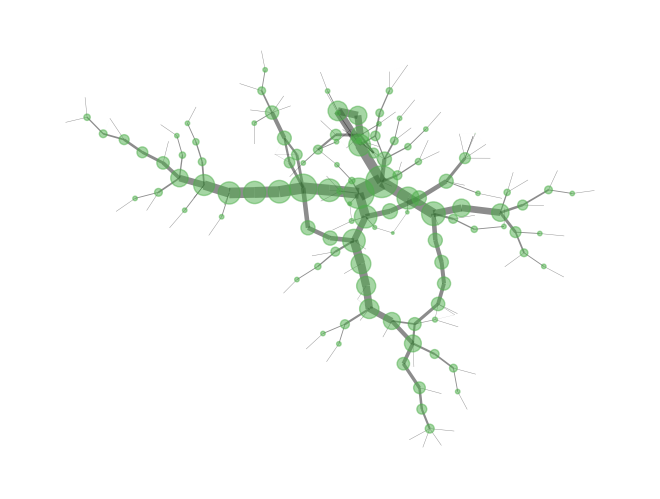

In [21]:
nx.draw(
    G = G_communication, 
    pos = nx.get_node_attributes(G=G_communication, name='pos'), 
    node_size = [1000*k for k in nodelist_communication['betweenness']], 
    node_color = '#4daf4a', 
    width = [30*e for e in edge_betweenness.values()], 
    alpha = .5
)

The plot depicts node betweenness centrality as node size and edge betweenness centrality as edge width. When interpreting the plot, it is important to recall that students use mobile phone communications to coordinate physical meetings and that the network we see is an aggregation of communications over one week. That means, the students that are highly between others are not ones that that are required to coordinate a single or few meetings but many of them. They can be expected to be coordinators in a larger sense. That said, it is always a good idea to think if using a particular centrality measure makes sense for a given network. For a network where nothing flows from node to node, it may be harder to argue for betweenness centrality. Read McLevey (2022, ch. 15.4) for a deeper discussion of centrality indices in the context of theory and research design.

<div class='alert alert-block alert-warning'>
<b>Additional resources</b>

Degree, closeness, and betweenness are the "big 3" centrality indices because they are widely used and fundamentally different. NetworkX offers a wide set of [other indices](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/centrality.html). Among them, [eigenvector centrality](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html) is worth mentioning. It computes the centrality for a node based on the centrality of its neighbors. A related algorithm for directed networks is [PageRank](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html) which was originaly developed to rank websites.    
</div>

GRANOVETTER

The stronger ties A-B and A-C are, the more likely it is that a tie B-C exists
Forbidden triad where B-C does not exist
No strong tie is a bridge OR Strong tie A-B is only abridge if both A and B have no other strong ties OR All bridges are weak ties
The removal of weak ties does more damage to transmission probabilities than of strong ties
If people tell rumours only to best friends, it will likely not leave the group
Marginal people with many weak ties are best placed to diffuse innovations because some of their ties will be bridges
Strong ties form a dense ego network, weak ties a less dense network
If one divides the neighbors of $v$ into sets of nodes to whom $v$ is strongly (or via weak non-bridges) or weakly connected, then nodes in the former set will tend to be connected to each other and have no connections to persons not tied to $v$, and nodes in the latter set will tend to be unconnected to each other but have connections to persons not tied to $v$.
Empirical confirmation: jobs found via weak ties mostly at distance 1, sometimes at distance 2
From a macro perspective, weak ties are important in effecting social cohesion
The more bridges in a population, the more cohesive the population
"Weak ties are more likely to link members of different small groups than are strong ones, which tend to be concentrated within particular groups." (p. 1376)

### D1.1.2. Closure and brokerage

Algorithms to measure closure and brokerage assign network-dependent numbers to nodes just like centrality indices, but historically they have not come to be treated as such. In fact, network analysis textbooks like the ones we are using in the course are mostly silent about brokerage. Nevertheless, it is a powerful concept that contrasts well with measures of closure. Let us start with closure. If you look at the network in figure 1, you will notice that closed groups are constituted by many triangles called **triads** in graph theory. The micro-level dynamics among three nodes can explain how higher-level structures emerge (McLevey, 2022, ch. 14.4).

Network closure is such a structural phenomenon. [Balance theory](https://en.wikipedia.org/wiki/Balance_theory) posits that there is a tendency of a friend of a friend to become a friend. Granovetter (1973) has refined this argument and proposes that this is indeed the case for strong ties, though not for weak ties. [Triadic closure](https://en.wikipedia.org/wiki/Triadic_closure) is the mechanism that forms closed network structure.

#### Clustering coefficient

|<img src='images/ego.png' style='float: right; width: 480px'>|
|:--|
|<em style='float: center'>**Figure 2**: Nodes with different neighborhoods</em>|

Let the **ego network** $G_v=(V_v,E_v)$ of a node $v$ be defined by a set of nodes $V_v$ that contains $v$ as well as all its neighbors and a set of edges $E_v$ that contains all edges among the nodes in $V_v$. In ***figure 2***, the ego networks of the white nodes are marked in red. The clustering coefficient is a very common measure of network closure. It quantifies the extent to which all triads that can potentially exist in $G_v$ are actually realized. Mathmatically, the clustering coefficient $cc$ of a node $v$ is defined as

$cc_v=\frac{2T_v}{k_v(k_v-1)}$

where $T_v$ is the number of triads that $v$ is a part of. $cc(v)=1$ when $G_v$ is fully connected. The ego networks of *figure 2* consist of six nodes for which ten triads are possible. Hence, the clustering coefficient of the left ego network is 0.4, on the right it is 0.1.

Call the [`clustering()`](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html) function to compute the clustering coefficients of all nodes in a graph. You can also take edge weights into account by passing to name of the corresponding edge attribute to the `weight` parameter:

In [22]:
clustering_communication = nx.clustering(G_communication)
#weighted_clustering_communication = nx.clustering(G=G_communication, weight='weight')

nodelist_communication['clustering'] = clustering_communication.values()
#nodelist_communication['weighted_clustering'] = weighted_clustering_communication.values()

The plot shows that the coefficient is non-zero but small when nodes with many edges are just part of few triads:

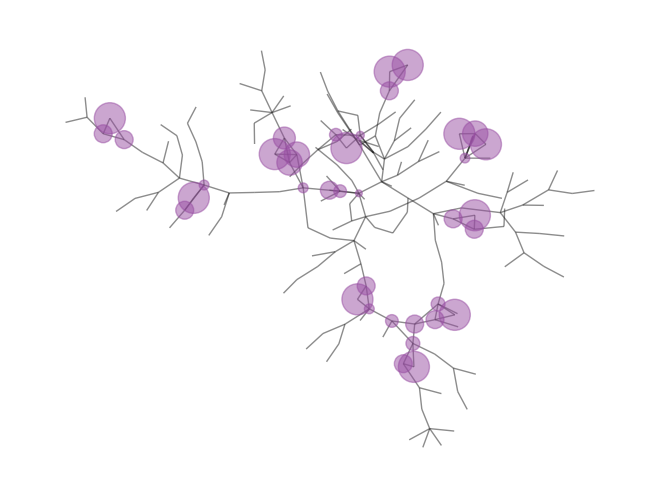

In [23]:
nx.draw(
    G = G_communication, 
    pos = nx.get_node_attributes(G=G_communication, name='pos'), 
    node_size = [500*k for k in nodelist_communication['clustering']], 
    node_color = '#984ea3', 
    alpha = .5
)

The **local efficiency** is a generalization of the clustering coefficient. It quantifies the extent to which neighbors of a node $v$ can reach each other if $v$ was removed. You can compute it using this function:

In [24]:
def node_local_efficiency(G):
    return {n: nx.global_efficiency(G=nx.subgraph(G=G, nbunch=list(nx.neighbors(G=G, n=n)))) for n in G.nodes()}

In [25]:
#local_efficiency_communication = node_local_efficiency(G_communication)

#nodelist_communication['local_efficiency'] = local_efficiency_communication.values()

#### Constraint

If triadic closure was the only mechanism governing network growth, then we would always see many fully-connected but isolated components. Certainly, this is not a good description of reality which is full of bridges between closed groups (Granovetter, 1973). If the clustering coefficient is a measure for how closed a node's neighborhood is, then we want our brokerage index to measure how open it is. Consider the extended ego networks of *figure 2*. In both networks, the white node has five neighbors. In the left one, these neighbors are strongly invested into other red nodes, and if they are invested into nodes that are not neighbors of $v$ (black nodes), then they tend to invest into the same black nodes. The structure is quite different – it is much more open – in the right network: red nodes are not as much invested into other red nodes. Instead, each red node tends to be connected to a different black node. As a result, the right network is much less redundant and offers many more options than the left one – it caontains more bridges.

Constraint is an index of openness. It quantifies the extent to which a node $v$ is invested in those neighbors that are themselves invested in the neighbors of $v$. Mathematically, the constraint $co$ of node $v$ is defined as

$co_v=\sum\limits_{w\in V_v\backslash\{v\}}(p_{vw}+\sum\limits_{x\in V_w\backslash\{w\}}p_{vx}p_{xw})^2$

where $V_v$ is the set of nodes from $v$'s ego network and $p_{vw}$ is the sum of the weights of edges joining $v$ and $w$ (edge weights are assumed to be one if the graph is unweighted). The index will be one for nodes that completely depend on another one and close to zero for nodes that are like the root of a tree-like structure.

Call the [`constraint()`](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.structuralholes.constraint.html) function to compute the constraint score of all nodes in a graph, potentially using a `weight` parameter:

In [26]:
constraint_communication = nx.constraint(G=G_communication)
#weighted_constraint_communication = nx.constraint(G=G_communication, weight='weight')

nodelist_communication['constraint'] = constraint_communication.values()
#nodelist_communication['weighted_constraint'] = weighted_constraint_communication.values()

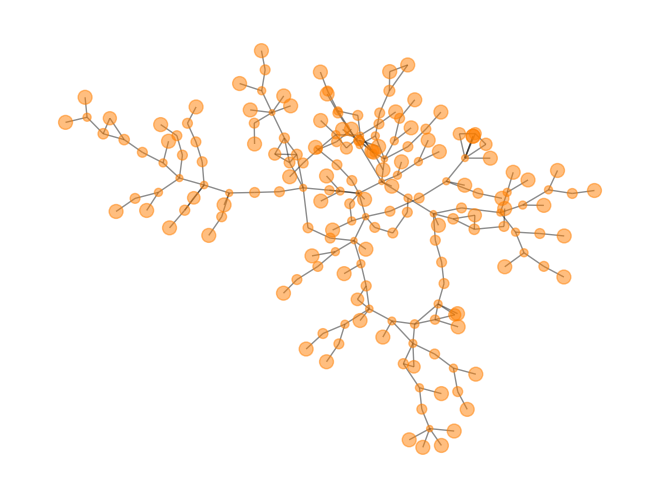

In [27]:
nx.draw(
    G = G_communication, 
    pos = nx.get_node_attributes(G=G_communication, name='pos'), 
    node_size = [100*k for k in nodelist_communication['constraint']], 
    node_color = '#ff7f00', 
    alpha = .5
)

The **effective size** is an alternative brokerage measure. It quantifies the extent to which neighbors of a node $v$ are not connected among themselves. The effective size of a node is mathematically related to its clustering coefficient and degree (Latora *et al.*, 2013). Hence, if the latter measures are also used in a study, the contraint metric should be used instead. You can compute it using the [`effective_size()`](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.structuralholes.effective_size.html) function:

In [28]:
#effective_size_communication = nx.effective_size(G_communication)
#weighted_effective_size_communication = nx.effective_size(G=G_communication, weight='weight')

#nodelist_communication['effective_size'] = effective_size_communication.values()
#nodelist_communication['weighted_effective_size'] = weighted_effective_size_communication.values()

### D1.1.3. Comparative analysis

We have computed standard measures for the "big 3" centralities as well as closure and brokerage:

In [29]:
nodelist_communication.head()

,degree,closeness,betweenness,clustering,constraint
0,0.010363,0.127815,0.161485,0.000000,0.500000
512,0.025907,0.142751,0.288986,0.000000,0.200000
4,0.020725,0.108488,0.085636,0.333333,0.375312
6,0.010363,0.116405,0.020617,0.000000,0.500000
521,0.010363,0.134121,0.263925,0.000000,0.500000


We want to see how our measures differ in practice. With Pandas, we can easily get the correlation matrix:

In [30]:
nodelist_communication.corr()

,degree,closeness,betweenness,clustering,constraint
degree,1.000000,0.408340,0.680428,0.143051,-0.839087
closeness,0.408340,1.000000,0.569660,-0.026412,-0.413429
betweenness,0.680428,0.569660,1.000000,-0.073177,-0.588158
clustering,0.143051,-0.026412,-0.073177,1.000000,0.065928
constraint,-0.839087,-0.413429,-0.588158,0.065928,1.000000


Unlike all other metrics, constraint is not a measure of "opportunity" but one for which large scores can be considered "bad." Since constraint ranges from zero to one, we can subtract it from 1 to arrive at a more comparable measure:

In [31]:
nodelist_communication['constraint'] = 1 - nodelist_communication['constraint']

#nodelist_communication['weighted_constraint'] = 1 - nodelist_communication['weighted_constraint']

We want to know which metrics produce similar results. Therefore, we use [multidimensional scaling]() (MDS) to embed our data into a two-dimensional space. The algorithm we use needs as input a dissimilarity matrix. The standard way to precompute dissimilarities from correlations is to subtract the latter from 1:

In [32]:
dissimilarities = (1 - nodelist_communication.corr()).values

Now reduce dimensionality and plot the result:

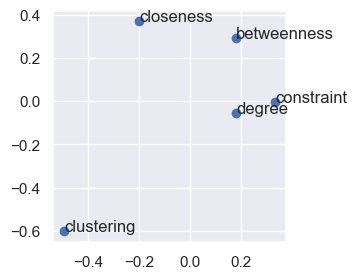

In [33]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42, dissimilarity='precomputed')
pos = mds.fit(dissimilarities).embedding_


plt.figure(figsize=[3, 3])
plt.scatter(pos[:, 0], pos[:, 1])
for i in range(0, len(nodelist_communication.columns)):
    plt.text(pos[i, 0], pos[i, 1], nodelist_communication.columns[i])

We see that the clustering coefficient is very different from all other metrics. From the literature we know that, in the limits of large data, it is inversely related to degree centrality (Barabási, 2002, ch. XXX). Both are local measures, which means, they are computed on ego networks. In agreement with that, constraint, the index supposed to measure the opposite of the clustering coefficient, is strongly correlated with degree centrality. This means that having many connections guards against positioning in a network that acts like a structural straightjacket. Constraint is somewhat correlated with betweenness centrality. This makes sense because being positioned between many other nodes certainly measure brokerage. Betweenness centrality is also used as such in SNA. A main difference is that constraint is a semi-local measure (computed on an extended ego network) while betweenness centrality is global. Finally, closeness centrality, also a global measure, is at most weakly correlated with the other indices and should not be used to measure brokerage or closure.

<div class='alert alert-block alert-danger'>
<b>Caution</b>

This comparison is only based on the communication network. Though the result generalizes quite well, it will certainly be different for other networks.
</div>

## D1.2. Community detection

In micro-level analysis, we have learned how to describe the entities at the lowest network level: nodes and edges. In this subsession, we move to a higher level in the structural hierarchy of networks. This subsession is about identifying aggregate entities that constitute groups of nodes. Community detection is the process of identifying community structure. **Communities** are mutually exclusive groups of nodes where nodes are more strongly connected to nodes of the same group than to nodes of other groups. In other words, community structure consists of closed groups connected via bridging ties. The existence of communities resembles a **pattern**, a non-trivial regularity (Menczer et al., 2020, ch. 6; McLevey, 2022, ch. 14).

If transactions (communications, see [Session C1. Network construction and visualization](../c_data_preprocessing_methods/1_network_construction_and_visualization.ipynb)) represented by edges among nodes are what is going on in networks, communities can help explain why transactions occur and actors (nodes) behave in certain ways. At first glance, communities are just clusters of nodes that originate in the aggregation of nodes and edges. In the case of social networks, the first level above transactions consists of social groups. But there are higher levels, think of organizations and markets. This kind of aggregation into nested levels is an example of **self-organization**, of the formation of patterns from the bottom up (from lower to higher levels) (Page, Simon or Watts in ix Degrees).

Typically, nodes belonging to the same community behave similarly, have similar attributes or attitudes. For example, persons in groups may have the same political leaning. But is this because similar persons chose to connect in groups (a bottom-up process) or because group connections cause similarity (a bottom-up process)? Network theory states that both processes occur, but at different time scales: in the short run, persons are free to form any kind of group; but in the long run, the groups they belong to influence the persons' behavior and attitudes. When both processes occur, when a meso-level pattern arises that sets expectations for micro-level behavior, then we say that the pattern has emerged. **Emergence** is the existence of a pattern that influences behavior at lower levels (Padgett & Powell, 2012).

In [Session C2. Multilayer and multimodal network construction](../c_data_preprocessing_methods/2_multilayer_and_multimodal_network_construction.ipynb), we have seen that social networks with community structure can be obtained when link stream data is aggregated to such an extent that 50% of the students are connected in the largest component. Four such networks are stored as layers in the `MG_bt` MultiGraph. We will now perform community detection on the first layer of this network. To extract a single layer, we must use a custom function:

In [34]:
def get_layer(G, layer, prune=True):
    '''
    Extracts a layer from a multilayer network.
    
    Parameters:
        G : MultiGraph or MultiDiGraph
            Multilayer network from which layer is to be 
            extracted.
        layer : Integer
            Key of the layer to extract.
        prune : Boolean, default True
            Whether nodes not participating in the extracted 
            layer should be removed.
    
    Returns:
        A weighted Graph.
    '''
    def filter_edge(u, v, key):
        return G.has_edge(u, v, layer)
    G_subgraph = nx.subgraph_view(G=G, filter_edge=filter_edge)
    if prune:
        def filter_node(v):
            return G_subgraph.degree[v] > 0
        G_subgraph_pruned = nx.subgraph_view(G=G_subgraph, filter_node=filter_node)
        if nx.is_directed(G):
            return nx.DiGraph(G_subgraph_pruned)
        else:
            return nx.Graph(G_subgraph_pruned)
    else:
        if nx.is_directed(G):
            return nx.DiGraph(G_subgraph)
        else:
            return nx.Graph(G_subgraph)

Now extract the layer (line 1), extract the largest connected component (line 2), prepare a dataframe to save community-detection results (line 3), create a network layout (line 4), and draw the network:

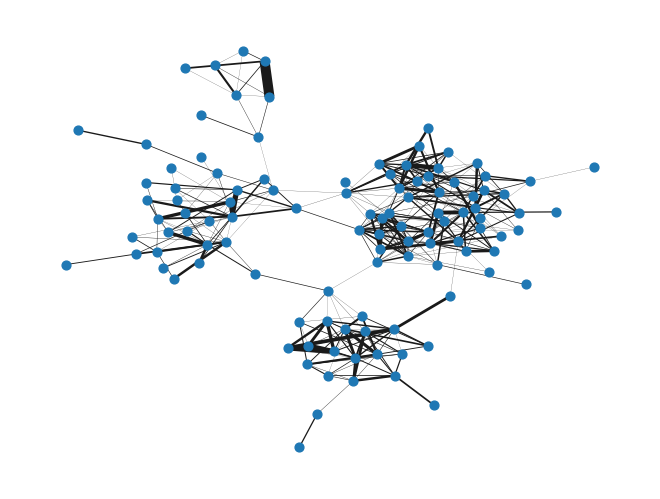

In [35]:
G_bt_snapshot = get_layer(G=MG_bt, layer=0, prune=True)
G_bt_snapshot_lcc = G_bt_snapshot.subgraph(nodes=sorted(nx.connected_components(G_bt_snapshot), key=len, reverse=True)[0])
nodelist_bt_snapshot_lcc = pd.DataFrame(index=G_bt_snapshot_lcc.nodes())
pos_bt_snapshot_lcc = nx.kamada_kawai_layout(G=G_bt_snapshot_lcc, weight=None)
nx.draw(
    G = G_bt_snapshot_lcc, 
    pos = pos_bt_snapshot_lcc, 
    node_size = 40, 
    width = [e / 200 for e in nx.get_edge_attributes(G=G_bt_snapshot_lcc, name='strength').values()]
)

The first snapshot of the face-to-face interaction network exhibits a clear community structure. This helps us estimate the face validity of the clustering solutions we will now get.

### D1.2.1. The Girvan-Newman algorithm

All community detection algorithms create one or many **node partitions**, which means, mappings of nodes to communities. In principle, a node can be mapped to multiple communities. Then communities are said to overlap. Here, we only discuss non-overlapping communities. Community detection algorithms maximize the number of edges that are internal to communities and minimize the number of edges that are between communities. The Girvan-Newman algorithm is popular because it is based on the very intuitive idea that bridging ties are removed until the network falls apart into communities (closed groups). It is a top-down method because it starts with the whole network. The first bridge to be removed is the one with the largest betweenness centrality. Then all edge betweenness centrality scores are computed anew, and the edge with the now largest score is removed. As you can see, this algorithm is very time-consuming because all scores must be computed in each iteration. Hence, the method is only suited for small networks (Menczer *et al.*, 2020, pp. 163–165).

The [`girvan_newman()`](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html) function does not use edge weights by default. Let us start with this default setting. The function returns a so-called generator object:

In [36]:
from networkx.algorithms.community import girvan_newman

In [37]:
communities = girvan_newman(G_bt_snapshot_lcc)
communities

<generator object girvan_newman at 0x0000020D8C74BE40>

The generator objects is used to save time – or better: to only spend time when it is needed. The generator object is an [iterator](https://www.w3schools.com/python/python_iterators.asp) that returns a partition each time it is asked to return the partition of the `next()` level. The first time you execute the following cell, it will return a partition that consists of two communities; the second time three communities; and so on:

In [38]:
next_communities = next(communities)
next_communities

({6,
  27,
  41,
  61,
  83,
  109,
  130,
  147,
  158,
  165,
  166,
  178,
  196,
  218,
  230,
  272,
  274,
  287,
  291,
  296,
  308,
  323,
  330,
  355,
  382,
  383,
  395,
  469,
  479,
  484,
  492,
  538,
  546,
  550,
  588,
  589,
  615,
  644},
 {3,
  18,
  29,
  56,
  63,
  67,
  88,
  90,
  97,
  100,
  137,
  139,
  145,
  146,
  148,
  151,
  152,
  176,
  177,
  181,
  182,
  195,
  198,
  201,
  207,
  235,
  239,
  240,
  254,
  260,
  266,
  300,
  301,
  334,
  335,
  353,
  357,
  358,
  378,
  388,
  404,
  407,
  411,
  414,
  416,
  424,
  449,
  454,
  465,
  467,
  476,
  481,
  485,
  488,
  499,
  506,
  507,
  509,
  524,
  559,
  568,
  570,
  571,
  572,
  578,
  600,
  611,
  636,
  637,
  659,
  665,
  677})

The partitions that the generator object returns are tuples of node sets, which is not exactly the desired format for using the partition in graph drawing or for saving it in a dataframe. To obtain a dictionary that maps each node to a community, we must write our own fundtion:

In [39]:
def get_partition(G, communities):
    '''
    Transforms a partition from a tuple into a dictionary.
    
    Parameters:
        G : Graph
            Graph for which communities have been detected.
        communities : Item of generator object
            Tuple of nodesets where each nodeset is a community.
    
    Returns:
        A dictionary of nodes (keys) and communities (values).
    '''
    d = dict(sorted({node: community for community in range(len(communities)) for node in list(communities[community])}.items()))
    return {node: d[node] for node in G.nodes()}

In [40]:
get_partition(G=G_bt_snapshot_lcc, communities=next_communities)

{272: 0,
 677: 1,
 97: 1,
 416: 1,
 100: 1,
 383: 0,
 166: 0,
 414: 1,
 181: 1,
 145: 1,
 378: 1,
 334: 1,
 404: 1,
 151: 1,
 388: 1,
 659: 1,
 88: 1,
 308: 0,
 287: 0,
 467: 1,
 449: 1,
 665: 1,
 235: 1,
 465: 1,
 492: 0,
 61: 0,
 355: 0,
 196: 0,
 550: 0,
 572: 1,
 524: 1,
 152: 1,
 411: 1,
 3: 1,
 357: 1,
 266: 1,
 198: 1,
 479: 0,
 296: 0,
 239: 1,
 83: 0,
 484: 0,
 395: 0,
 330: 0,
 109: 0,
 476: 1,
 182: 1,
 207: 1,
 67: 1,
 130: 0,
 469: 0,
 56: 1,
 148: 1,
 407: 1,
 18: 1,
 291: 0,
 509: 1,
 570: 1,
 158: 0,
 588: 0,
 615: 0,
 636: 1,
 63: 1,
 568: 1,
 146: 1,
 201: 1,
 176: 1,
 481: 1,
 274: 0,
 644: 0,
 41: 0,
 260: 1,
 195: 1,
 506: 1,
 353: 1,
 177: 1,
 178: 0,
 6: 0,
 571: 1,
 254: 1,
 578: 1,
 240: 1,
 139: 1,
 589: 0,
 29: 1,
 90: 1,
 323: 0,
 27: 0,
 546: 0,
 637: 1,
 600: 1,
 507: 1,
 559: 1,
 358: 1,
 424: 1,
 335: 1,
 488: 1,
 137: 1,
 611: 1,
 230: 0,
 147: 0,
 538: 0,
 499: 1,
 300: 1,
 218: 0,
 454: 1,
 485: 1,
 301: 1,
 382: 0,
 165: 0}

The function returns a dictionary of the partition at an increasingly lower level each time it is called. Call the above cell `next_communities = next(communities)` multiple times. You will see that the number of communities will increase each time:

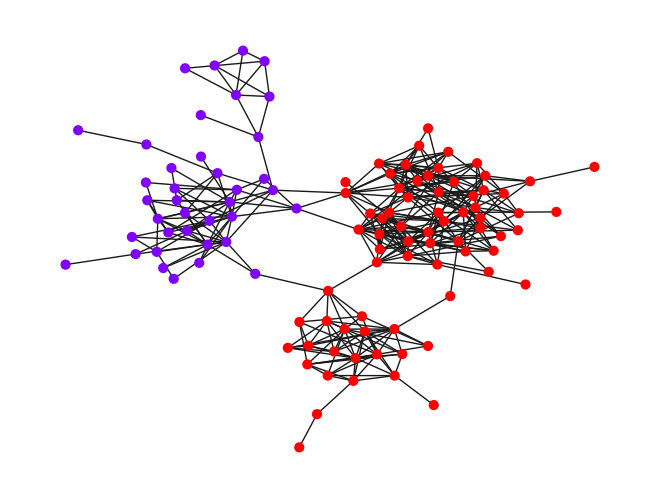

In [41]:
nx.draw(
    G = G_bt_snapshot_lcc, 
    pos = pos_bt_snapshot_lcc, 
    node_size = 40, 
    node_color = list(get_partition(G=G_bt_snapshot_lcc, communities=next_communities).values()), 
    cmap = plt.cm.rainbow
)

#### Evaluation

The Girvan-Newman algorith works from the top down. But where to stop? What is the right number of communities? These questions are impossible to answer as there is no correct number. Community detection is a [heuristic](https://en.wikipedia.org/wiki/Heuristic) "that employs a practical method that is not guaranteed to be optimal, perfect, or rational, but is nevertheless sufficient for reaching an immediate, short-term goal or approximation." Communities are latent variables that make sense within some theoretical framework. Face validity is important, which means, you can use a partition in your research if it makes sense to you and helps you formulate hypotheses why the nodes and the whole network behave the way they do.

Still, it is possible to quantitatively base the decision on the number of communities on the data at hand. This decision is based on the extent to which the algorithm manages to minimize the number of edges between communities. This measure is called **modularity**, mathematically defined for an undirected and unweighted graph as

$Q=\frac{1}{m}\sum\limits_c(L_c-\frac{k_c^2}{4m})$

where $m$ is the number of edges in the network, the sum extends over all communities $c$, $L_c$ is is the number of links internal to $c$, and $k_c$ is the total degree of the nodes in $c$. In this formula, $\frac{k_c^2}{4m}$ is the expected number of links internal to $c$ (if the edges were randomly distributed in the network while each node keeps its original degree). Hence, modularity is the normalized sum of differences of the observed and expected numbers of community-internal edges. $Q$ will be 1 if all edges are within communities. Have a look at Menczer *et al.* (2020, pp. 166) for a deeper explanation and definitions of $Q$ when networks are directed and/or weighted.

The [`modularity()`](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html) of the current partition stored in `next_communities` is:

In [42]:
from networkx.algorithms.community import modularity

In [43]:
modularity(G=G_bt_snapshot_lcc, communities=next_communities)

0.3472944234404537

Finding the best number of communities is an optimization problem. We must infer a series of partitions with an increasing number of communities, compute the modularity for each level, and pick the level with the largest modularity. First, we use a custom function `girvan_newman_communities()` that infers a nested hierarchy of up to `n_communities` clusters, potentially using edge weights:

In [44]:
def girvan_newman_communities(G, n_communities, weight=None):
    '''
    Infers a hierarchy of nested partitions.
    
    Parameters:
        G : Graph
            Graph for which communities are to be detected.
        n_communities : Integer
            Number of communities in the lowest level of the 
            hierarchy. At the highest level there will be two 
            communities.
        weight : String or None
            Name of the edge attribute. Must contain numericals 
            where larger values indicate stronger weights. If 
            None wegihts are assumed to be 1.
    
    Returns:
        A dataframe where each column is a partition and a vector 
        of modularity scores.
    '''
    from tqdm.notebook import tqdm
    
    nodelist = pd.DataFrame(index=G.nodes())
    modularities = []
    if weight:
        def most_central_edge(G):
            centrality = nx.edge_betweenness_centrality(G=G, weight=weight)
            return max(centrality, key=centrality.get)
        communities = girvan_newman(G=G, most_valuable_edge=most_central_edge)
    else:
        communities = girvan_newman(G=G)
    for i in tqdm(range(2, n_communities + 1)):
        next_communities = next(communities)
        partition = get_partition(G=G, communities=next_communities)
        nodelist[i] = partition.values()
        modularities.append(modularity(G=G, communities=next_communities))
    return nodelist, modularities

The function will create a generator object and ask it to return the partition at the next lower level until the last partition has the desired number of communities, and it will be increasingly slow the larger your netwok is. it returns a dataframe where each column is a partition and a vector of modularity scores:

In [45]:
partitions, modularities = girvan_newman_communities(G=G_bt_snapshot_lcc, n_communities=20)

  0%|          | 0/19 [00:00<?, ?it/s]

In [46]:
partitions

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
272,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
677,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
97,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
416,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
100,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,1,1,1,1,1,1,1,8,9,10,11,12,13,14,15,16,16,17,18
485,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,5,5,5,5
301,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,17,18,19
382,0,0,0,0,0,0,0,0,0,9,10,11,12,13,14,15,15,16,17


In [47]:
modularities

[0.3472944234404537,
 0.5620680233931947,
 0.573805233931947,
 0.5726606805293005,
 0.5715013586956521,
 0.5703383447542533,
 0.569171638705104,
 0.5680012405482042,
 0.566812381852552,
 0.5634156427221173,
 0.5610600779773157,
 0.5586897448015125,
 0.6308261460302459,
 0.6179074610113423,
 0.6179406899810966,
 0.6162275519848773,
 0.6140085952268433,
 0.6116530304820419,
 0.6069271325614369]

The optimal number of communities with the maximum modularity is this number of communities:

In [48]:
n_communities_optimal = modularities.index(max(modularities)) + 2
n_communities_optimal

14

See how modularity peaks at 14 communities and then decreases continuously:

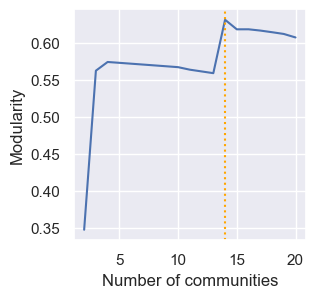

In [49]:
plt.figure(figsize=[3, 3])
plt.plot(partitions.columns, modularities)
plt.axvline(x=n_communities_optimal, color='orange', ls=':')
plt.xlabel('Number of communities')
plt.ylabel('Modularity')
plt.show()

Now we use `n_communities_optimal` to get the best partition from the `partitions` dataframe and plot it:

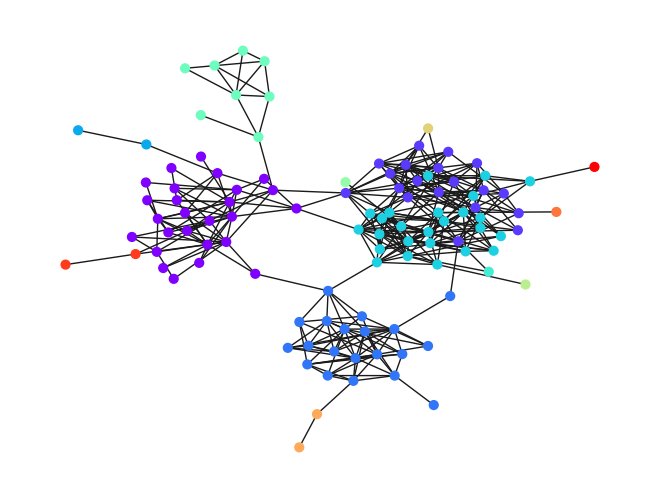

In [50]:
nx.draw(
    G = G_bt_snapshot_lcc, 
    pos = pos_bt_snapshot_lcc, 
    node_size = 40, 
    node_color = partitions[n_communities_optimal], 
    cmap = plt.cm.rainbow
)

The result is a little unsatisfying because it maps single nodes and node pairs to new communities. Wouldn't it make more sense if the algorithm attributed those nodes to four or five main communities? Let us see what result we get if we use the edge weights. In this case they give the proximity scores summed over 5 minute intervals, so they are measures of face-to-face interaction intensity:

In [51]:
partitions_weight, modularities_weight = girvan_newman_communities(G=G_bt_snapshot_lcc, n_communities=20, weight='strength')

  0%|          | 0/19 [00:00<?, ?it/s]

In [52]:
n_communities_optimal_weight = modularities_weight.index(max(modularities_weight)) + 2
n_communities_optimal_weight

5

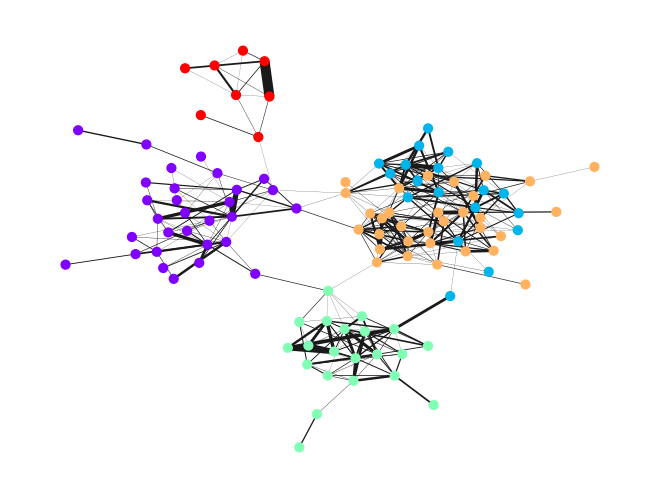

In [53]:
nx.draw(
    G = G_bt_snapshot_lcc, 
    pos = pos_bt_snapshot_lcc, 
    node_size = 40, 
    node_color = partitions_weight[n_communities_optimal_weight], 
    cmap = plt.cm.rainbow, 
    width = [e / 200 for e in nx.get_edge_attributes(G=G_bt_snapshot_lcc, name='strength').values()]
)

It turns out that the optimal number of communities is now five, as we suggested. Since this partition makes sense to us, we store it in our dataframe:

In [54]:
nodelist_bt_snapshot_lcc['girvan_newman'] = partitions_weight[n_communities_optimal_weight]

We learn from this exercise that using or not using edge weights matters. It is a design choice you must make during your research. Chosing among the possible community detections is another decision to make. It will also influence your result.

### D.1.2.2. The Louvain algorithm

Other than the Girvan-Newman algorithm, the Louvain algorithm detects communities from the bottom up and directly comes up with an optimal number of communities. It is based on modularity maximization. To initialize the clustering process, each node is assigned its own community. The algorithm then works in two steps that are iterated until there is nothing left to optimize. First, the algorithm moves nodes into that neighboring community for which modularity increases most. If no increase is possible, a node stays in its original community. The first phase continues until no move can improve modularity. Second, a new network is constructed whose nodes are the communities found in the first step. These two steps are executed until no modularity gain is achieved. At the end of each iteration, thus, stands a coarser partition at a higher level, with fewer communities and larger modularity. This hierarchical merging process guarantees that the algorithm is very fast also on very large networks (Menczer *et al.*, 2020, pp. 165–171; McLevey, 2022, ch. 14.5).

The [`louvain_partitions()`](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_partitions.html) function returns the partitions (via a generator object) at all the levels the clustering algorithm iterates through. It can be used to cluster any kind of graph (Graph, DiGraph, MultiGraph, or MultiDiGraph). For our undirected network snapshot and no edge weights, there are two levels:

In [55]:
from networkx.algorithms.community import louvain_partitions

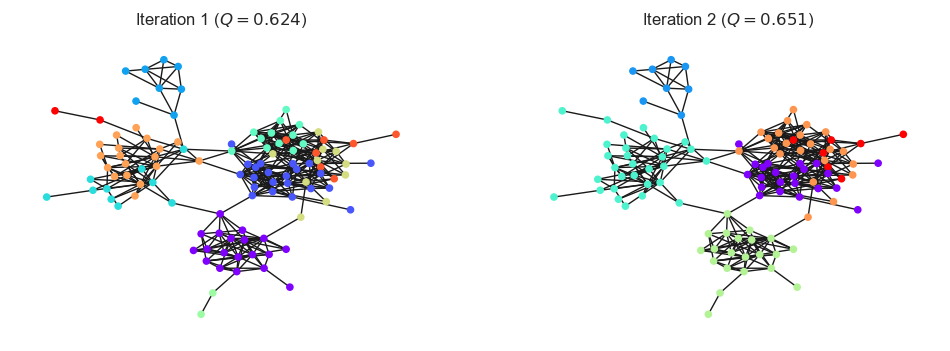

In [56]:
communities = louvain_partitions(G=G_bt_snapshot_lcc, weight=None, seed=42)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
for i in range(2):
    next_communities = next(communities)
    axs[i].set_title(f'Iteration {i + 1} ($Q = {round(modularity(G=G_bt_snapshot_lcc, communities=next_communities), 3)}$)')
    nx.draw(
        G = G_bt_snapshot_lcc, 
        pos = pos_bt_snapshot_lcc, 
        ax = axs[i], 
        node_size = 20, 
        node_color = list(get_partition(G=G_bt_snapshot_lcc, communities=next_communities).values()), 
        cmap = plt.cm.rainbow, 
        #width = [e / 300 for e in nx.get_edge_attributes(G=G_bt_snapshot_lcc, name='strength').values()]
    )

The [`louvain_communities()`](https://networkx.org/documentation/networkx-2.8.4/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html) function just returns the higest-level partitin for which modularity is largest:

In [57]:
from networkx.algorithms.community import louvain_communities

In [58]:
louvain = louvain_communities(G=G_bt_snapshot_lcc, weight=None, seed=42)

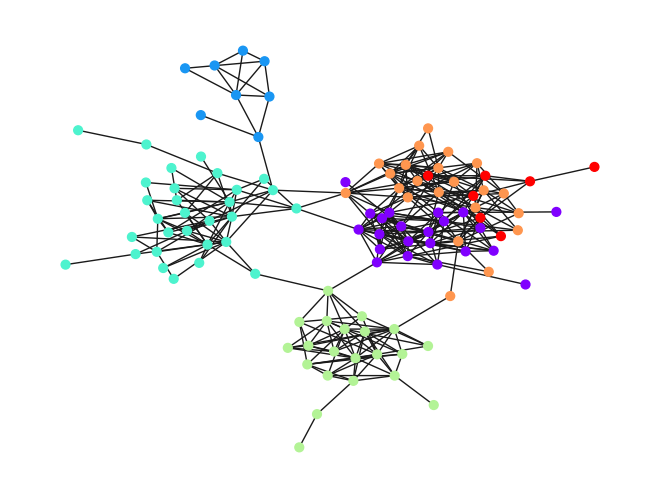

In [59]:
nx.draw(
    G = G_bt_snapshot_lcc, 
    pos = pos_bt_snapshot_lcc, 
    node_size = 40, 
    node_color = list(get_partition(G=G_bt_snapshot_lcc, communities=louvain).values()), 
    cmap = plt.cm.rainbow, 
    #width = [e / 200 for e in nx.get_edge_attributes(G=G_bt_snapshot_lcc, name='strength').values()]
)

In [60]:
modularity(G=G_bt_snapshot_lcc, communities=louvain)

0.6505530777410209

Note that the partition and modularity score are the same as in the last (second) iteration above.

#### Consensus clustering

Quite often different moves will result in the same modularity gain. In such situations, the decision which move to make will be made randomly. The partition inferred by the Louvain algorithm is, thus, very sensitive to node moves, particularly in the first iteration. In the above exercises, we have used a random `seed=42` which guarantees that the algorithm always returns the same output. But you will notice that partitions change slightly or even greatly when you change the seed.

To circumvent this reproducibility problem, we can use consensus clustering. The idea is to infer many partitions (for example, 100), using a different seed each time. Then a consensus graph is created where edges now indicate how many times two nodes were mapped to the same cluster. Nodes for which there is a strong consensus that they belong to the same cluster will have a strong tie. This network is then itself clustered to obtain the consensus partition (Lancichinetti & Fortunato, 2012).

Since NetworkX does not offer consensus clustering, we write or own `louvain_consensus_communities()` function:

In [61]:
import numpy as np

In [62]:
def louvain_consensus_communities(G, number_of_iterations=100, weight=None, resolution=1., seed=None):
    '''
    Infers a consensus partition.
    
    Parameters:
        G : Graph
            Graph for which communities are to be detected.
        number_of_iterations : Integer
            How many times the Louvain algorithms should be run 
            with a different random seed.
        weight : String or None
            Name of the edge attribute. Must contain numericals 
            where larger values indicate stronger weights. If 
            None wegihts are assumed to be 1.
        resolution : Float, default 1
            If resolution is less than 1, the algorithm favors 
            larger communities. Greater than 1 favors smaller 
            communities.
        seed : Numerical or 42 (default)
            Indicator of random number generation state for the 
            final clustering of the consensus graph.
    
    Returns:
        Tuple of nodesets where each nodeset is a community.
    '''
    from tqdm.notebook import tqdm
    
    a = np.empty([G.number_of_nodes(), number_of_iterations], dtype=object)
    number_of_communities = 0
    for i in tqdm(range(number_of_iterations)):
        a[:, i] = [community + number_of_communities for community in get_partition(G=G, communities=louvain_communities(G=G, weight=weight, resolution=resolution, seed=i)).values()]
        number_of_communities = max(a[:, i]) + 1
    a = a.astype(str)
    
    B = nx.Graph()
    B.add_nodes_from(G)
    for i in range(number_of_iterations):
        B.add_edges_from(zip(G.nodes(), a[:, i]))
    G_consensus = nx.bipartite.overlap_weighted_projected_graph(B=B, nodes=G.nodes())
    
    return louvain_communities(G=G_consensus, weight='weight', seed=seed)

Infer the consensus partition using 100 iterations (line 1), store the consensus partition in the nodelist (line 2), and internalize the partition as a node attribute (line 3):

In [63]:
louvain_consensus = louvain_consensus_communities(G=G_bt_snapshot_lcc, number_of_iterations=100, weight=None, resolution=1.)
nodelist_bt_snapshot_lcc['louvain_consensus'] = get_partition(G=G_bt_snapshot_lcc, communities=louvain_consensus).values()
nx.set_node_attributes(G=G_bt_snapshot_lcc, values=nodelist_bt_snapshot_lcc['louvain_consensus'], name='louvain_consensus')

  0%|          | 0/100 [00:00<?, ?it/s]

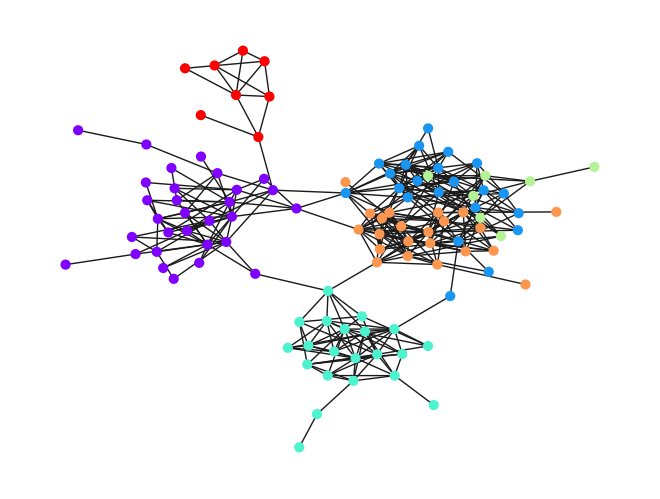

In [64]:
nx.draw(
    G = G_bt_snapshot_lcc, 
    pos = pos_bt_snapshot_lcc, 
    node_size = 40, 
    node_color = list(nx.get_node_attributes(G=G_bt_snapshot_lcc, name='louvain_consensus').values()), 
    cmap = plt.cm.rainbow, 
    #width = [e / 200 for e in nx.get_edge_attributes(G=G_bt_snapshot_lcc, name='strength').values()]
)

The consensus partition is almost identical to the clustering solution for `seed=42`.

We have stored the 'girvan_newman' and 'louvain_consensus' partitions in the `nodelist_bt_snapshot_lcc` dataframe. You can compare them by computing the [normalized mutual information](https://en.wikipedia.org/wiki/Mutual_information) of both partitions. This score is 1 if two partitions are identical and 0 if they are independent (Fortunato, 2010).

In [65]:
from sklearn.metrics import normalized_mutual_info_score

normalized_mutual_info_score(labels_true=nodelist_bt_snapshot_lcc['girvan_newman'], labels_pred=nodelist_bt_snapshot_lcc['louvain_consensus'])

0.9014063047654636

#### Strong and weak ties

Granovetter (1973) has proposed that closed groups (communities) are constituted by strong ties whereas communities are bridged by weak ties. Let us check if we find evidence for this. Recall that we have not used edge weights in detecting communities here. First, create two graphs of just intra- and inter-community ties, respectively:

In [66]:
def filter_edge_intra(n1, n2):
    if G_bt_snapshot_lcc.nodes[n1]['louvain_consensus'] == G_bt_snapshot_lcc.nodes[n2]['louvain_consensus']:
        return True
    else:
        return False
def filter_edge_inter(n1, n2):
    if G_bt_snapshot_lcc.nodes[n1]['louvain_consensus'] != G_bt_snapshot_lcc.nodes[n2]['louvain_consensus']:
        return True
    else:
        return False

G_bt_snapshot_lcc_intra = nx.subgraph_view(G=G_bt_snapshot_lcc, filter_edge=filter_edge_intra)
G_bt_snapshot_lcc_inter = nx.subgraph_view(G=G_bt_snapshot_lcc, filter_edge=filter_edge_inter)

Second, get the average tie strengths for the two graphs:

In [67]:
strength_intra = list(nx.get_edge_attributes(G=G_bt_snapshot_lcc_intra, name='strength').values())
strength_inter = list(nx.get_edge_attributes(G=G_bt_snapshot_lcc_inter, name='strength').values())

We do find evidence for the hypothesis:

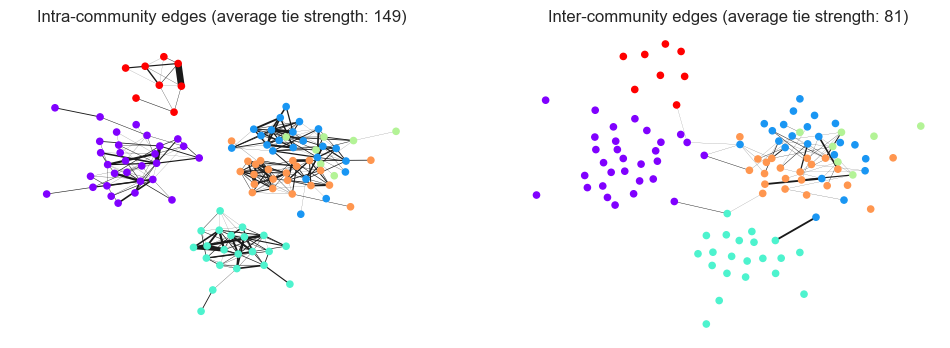

In [68]:
networks = [G_bt_snapshot_lcc_intra, G_bt_snapshot_lcc_inter]
titles = [f'Intra-community edges (average tie strength: {int(np.mean(strength_intra))})', f'Inter-community edges (average tie strength: {int(np.mean(strength_inter))})']

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
for i in range(2):
    axs[i].set_title(titles[i])
    nx.draw(
        G = networks[i], 
        pos = pos_bt_snapshot_lcc, 
        ax = axs[i], 
        node_size = 20, 
        node_color = list(nx.get_node_attributes(G=networks[i], name='louvain_consensus').values()), 
        cmap = plt.cm.rainbow, 
        width = [width/300 for width in nx.get_edge_attributes(G=networks[i], name='strength').values()]
    )

The average scores are significantly different ($p<0.01$), as told by SciPy's [`ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html):

In [69]:
from scipy.stats import ttest_ind

ttest_ind(strength_intra, strength_inter)

Ttest_indResult(statistic=3.1163304784217587, pvalue=0.001975835561332527)

#### Dynamic community detection

So far, we have used community detection for Graphs but not for MultiGraphs. Our `MG_bt` graph is a multilayer network where the four layers correspond to four consecutive snapshots of face-to-face interaction. It is possible to simply detect communities – in the following case: consensus communities – in this MultiGraph:

In [70]:
louvain_consensus_mg = louvain_consensus_communities(G=MG_bt, number_of_iterations=100, weight='strength')
nodelist_bt['louvain_consensus'] = get_partition(G=MG_bt, communities=louvain_consensus_mg).values()
nx.set_node_attributes(G=MG_bt, values=nodelist_bt['louvain_consensus'], name='louvain_consensus')

  0%|          | 0/100 [00:00<?, ?it/s]

Modularity is not very high:

In [71]:
modularity(G=MG_bt, communities=louvain_consensus_mg)

0.6625382083198103

Plot the result:

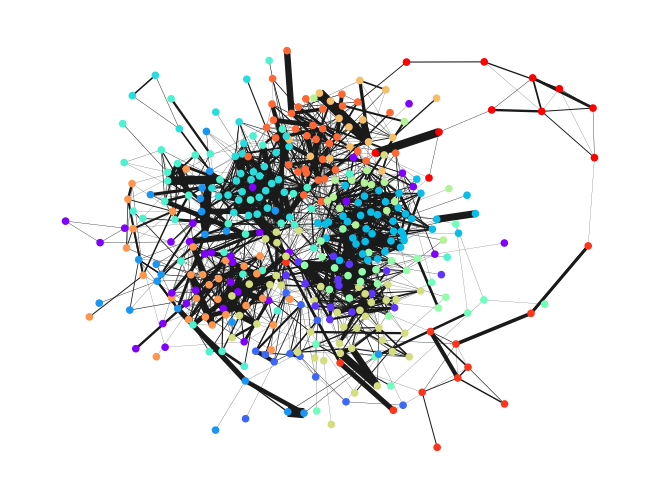

In [72]:
nx.draw(
    G = MG_bt, 
    pos = nx.get_node_attributes(G=MG_bt, name='pos'), 
    node_size = 20, 
    node_color = list(nx.get_node_attributes(G=MG_bt, name='louvain_consensus').values()), 
    cmap = plt.cm.rainbow, 
    width = [width / 200 for width in nx.get_edge_attributes(G=MG_bt, name='strength').values()]
)

Are you also not satisfied with the result? What is going on here? A look at the [source code](https://networkx.org/documentation/networkx-2.8.4/_modules/networkx/algorithms/community/louvain.html) of the Louvain algorithm reveals that NetworkX sums up the edge weights from multiple layers to create a graph without layers before it infers the communities. Since our layers correspond to time, this means that the temporal information is disregarded and all snapshots are assumed to occur simultaneously. This may work if the network structure hardly changes. But what if it does?

The following plot shows the four layers of the previous figure individually (line 2), using the partition (line 5) as well as the layout (line 9) from the multilayer network. When nodes have the same color this means that they belong to the same time-disrespecting community. We see that the network structure does change: 

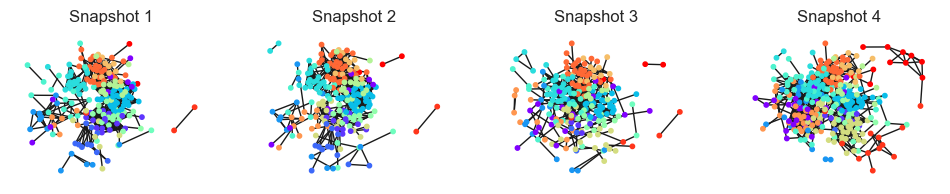

In [73]:
fig, axs = plt.subplots(1, 4, figsize=(12, 2))
for layer in range(4):
    axs[layer].set_title(f'Snapshot {layer+1}')
    G_bt_snapshot_pruned = get_layer(G=MG_bt, layer=layer)
    partition_snapshot_pruned = get_partition(G=G_bt_snapshot_pruned, communities=louvain_consensus_mg)
    nx.draw(
        G = G_bt_snapshot_pruned, 
        ax = axs[layer], 
        pos = nx.get_node_attributes(G=MG_bt, name='pos'), 
        node_size = 10, 
        node_color = list(partition_snapshot_pruned.values()), 
        cmap = plt.cm.rainbow
    )

In the case of temporal layers, it is a better idea to cluster the layers individually, simply because past ties are increasingly irrelevant for present behavior the older they are. The following plot differs from the previous one only in the communities – they are now inferred layer by layer (line 5):

Community detection for snapshot 1


  0%|          | 0/100 [00:00<?, ?it/s]

Community detection for snapshot 2


  0%|          | 0/100 [00:00<?, ?it/s]

Community detection for snapshot 3


  0%|          | 0/100 [00:00<?, ?it/s]

Community detection for snapshot 4


  0%|          | 0/100 [00:00<?, ?it/s]

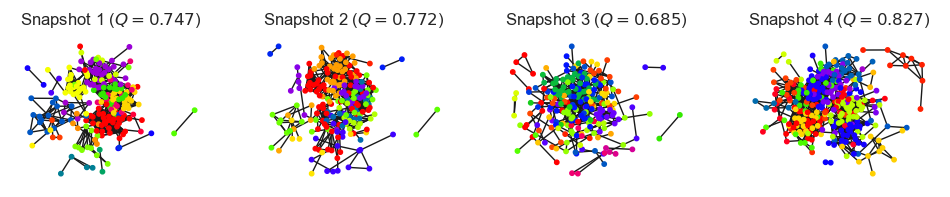

In [74]:
fig, axs = plt.subplots(1, 4, figsize=(12, 2))
for layer in range(4):
    G_bt_snapshot_pruned = get_layer(G=MG_bt, layer=layer)
    print(f'Community detection for snapshot {layer+1}')
    communities_snapshot_pruned = louvain_consensus_communities(G=G_bt_snapshot_pruned, number_of_iterations=100, weight='strength')
    partition_snapshot_pruned = get_partition(G=G_bt_snapshot_pruned, communities=communities_snapshot_pruned)
    axs[layer].set_title(f'Snapshot {layer+1} ($Q={round(modularity(G=G_bt_snapshot_pruned, communities=communities_snapshot_pruned), 3)}$)')
    nx.draw(
        G = G_bt_snapshot_pruned, 
        ax = axs[layer], 
        pos = nx.get_node_attributes(G=MG_bt, name='pos'), 
        node_size = 10, 
        node_color = list(partition_snapshot_pruned.values()), 
        cmap = plt.cm.prism
    )

The modularity scores indicate that communities in snapshots 1 and 2 have fairly clear boundaries (*i.e.*, many ties are inside communities). $Q$ then drops in snapshot 3, which means, the network becomes more chaotic and clusters are harder to detect. Finally, in snapshot 4, boundaries have become very clear. This is evidence for changes in community structure.

In the above plot, the same color in different layers does not mean anymore that nodes belong to the same community. To make this clear, we have used another colormap (`plt.cm.prism` instead of `plt.cm.rainbow`). Yet, it would be nice to know where exactly there is stability in community structure and where there has been change, or where a community that has existed in one snapshot reappears in a later one. A possibility to do this is to identify the overlap of community pairs. If they have a certain fraction of nodes in common they are said to be the same across different layers. This is what the following `louvain_overlap_communities()` function does. The algorithm proceeds in four steps. First (lines 38-48), partitions from layer-specific community detection are stored in a dataframe. Second (lines 50-58), a graph is constructed with communities as nodes that are connected if the fraction of overlapping nodes is larger than, or equal to, the fraction specified by the `overlap` parameter (set to 50% by default). Third (lines 60-68), nodes in the same connected component are put into the same community. Fourth (lines 70-74), community indices are cleaned up such that the largest community index equals the total number of unique communities. The algorithm makes sure that the community indices increase with the layer key. This way the indices can be interpreted temporally, which means, smaller community indices will be older.

In [75]:
def louvain_overlap_communities(G, overlap=.5, number_of_iterations=None, weight='weight', resolution=1., seed=None):
    '''
    Detects ordered communities that overlap in multiple layers 
    of a multilayer network in terms of nodes.
    
    Parameters:
        G : MultiGraph
            Network for which layer-overlapping communities are 
            to be detected. Layer keys must be contiguous 
            integers starting with 0.
        overlap : Float
            Fraction of nodes required to decide if two 
            communities in different layers are the same.
        number_of_iterations : Integer or None
            Number of runs to be used in consensus clustering. If 
            None, no consensus clustering is performed.
        weight : String or None
            Name of the edge attribute. Must contain numericals 
            where larger values indicate stronger weights. If 
            None wegihts are assumed to be 1.
        resolution : Float, default 1
            If resolution is less than 1, the algorithm favors 
            larger communities. Greater than 1 favors smaller 
            communities.
        seed : Numerical or None (default)
            Indicator of random number generation state for the 
            final clustering of the consensus graph or, if no 
            consensus clustering is performed, for the one run of 
            the algorithm.
    
    Returns:
        Pandas DataFrame with as many partitions in columns as 
        there are layers. Community indices are ordered, which 
        means, communities' indices increase with layer keys. The 
        same community index in different columns means that it 
        is the same layer-overlapping community.
    '''
    number_of_layers = max([key for (u, v, key) in G.edges.keys()]) + 1
    df = pd.DataFrame(index=G.nodes())
    number_of_communities = 0
    for layer in range(number_of_layers):
        G_layer = get_layer(G=G, layer=layer)
        if number_of_iterations:
            print(f'Community detection for snapshot {layer+1}')
            df[layer] = df.index.map({node: community + number_of_communities for node, community in get_partition(G=G_layer, communities=louvain_consensus_communities(G=G_layer, number_of_iterations=number_of_iterations, weight=weight, resolution=resolution, seed=seed)).items()})
        else:
            df[layer] = df.index.map({node: community + number_of_communities for node, community in get_partition(G=G_layer, communities=louvain_communities(G=G_layer, weight=weight, resolution=resolution, seed=seed)).items()})
        number_of_communities = df[layer].max() + 1
    
    B = nx.DiGraph()
    for layer in range(number_of_layers):
        B.add_edges_from(zip(df[layer].dropna().index.astype(str), df[layer].dropna().values))
    B = nx.Graph(B)
    G_overlap = nx.bipartite.overlap_weighted_projected_graph(B=B, nodes=pd.unique(df.dropna().values.ravel()))
    def filter_edge_overlap(u, v):
        if G_overlap[u][v]['weight'] >= overlap:
            return G_overlap[u][v]['weight']
    G_overlap_filter = nx.Graph(nx.subgraph_view(G=G_overlap, filter_edge=filter_edge_overlap))
    
    cc = nx.connected_components(G_overlap_filter)
    cc = [list(c) for c in cc]
    cc = [[int(i) for i in c] for c in cc]
    cc = [sorted(c) for c in cc]
    for i in range(len(cc)):
        size = len(cc[i])
        if size > 1:
            for j in range(1, size):
                df.replace(to_replace=cc[i][j], value=cc[i][0], inplace=True)
    
    mapping = pd.DataFrame(df.values.ravel(), columns=['community']).dropna().drop_duplicates()
    mapping = mapping.sort_values('community').reset_index(drop=True).reset_index().set_index('community')
    mapping = mapping.to_dict()['index']
    for column in df.columns:
        df[column] = df[column].map(mapping)
    
    return df

Applying the function to the multilayer network, we set `overlap=.5` and perform `number_of_iterations=100` in consensus clustering using weighted edges:

In [76]:
louvain_overlap = louvain_overlap_communities(G=MG_bt, overlap=.5, number_of_iterations=100, weight='strength')

Community detection for snapshot 1


  0%|          | 0/100 [00:00<?, ?it/s]

Community detection for snapshot 2


  0%|          | 0/100 [00:00<?, ?it/s]

Community detection for snapshot 3


  0%|          | 0/100 [00:00<?, ?it/s]

Community detection for snapshot 4


  0%|          | 0/100 [00:00<?, ?it/s]

The result is a Pandas DataFrame with as many columns as there are layers. Each column is a partition. The same community index in different columns means that it is the same layer-overlapping community (indices are floats because each column contains NaN values when the corresponding node is not active in that layer):

In [77]:
louvain_overlap

,0,1,2,3
359,NaN,NaN,43.0,74.0
244,NaN,25.0,70.0,74.0
372,NaN,25.0,70.0,75.0
133,NaN,25.0,70.0,76.0
444,0.0,34.0,34.0,77.0
...,...,...,...,...
76,NaN,NaN,NaN,87.0
165,2.0,NaN,NaN,NaN
497,21.0,21.0,21.0,94.0
36,NaN,NaN,53.0,80.0


We will now use the columns of that dataframe for drawing the four snapshots:

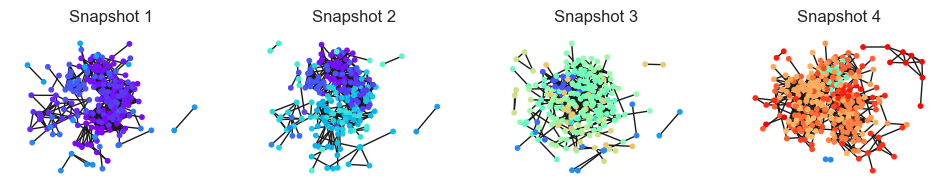

In [78]:
fig, axs = plt.subplots(1, 4, figsize=(12, 2))
for layer in range(4):
    axs[layer].set_title(f'Snapshot {layer+1}')
    nx.set_node_attributes(G=MG_bt, values=louvain_overlap[layer], name='louvain_overlap')
    G_bt_snapshot_pruned = get_layer(G=MG_bt, layer=layer)
    nx.draw(
        G = G_bt_snapshot_pruned, 
        ax = axs[layer], 
        pos = nx.get_node_attributes(G=MG_bt, name='pos'), 
        node_size = 10, 
        node_color = list(nx.get_node_attributes(G=G_bt_snapshot_pruned, name='louvain_overlap').values()), 
        cmap = plt.cm.rainbow, 
        vmin = louvain_overlap.min().min(), 
        vmax = louvain_overlap.max().max()
    )

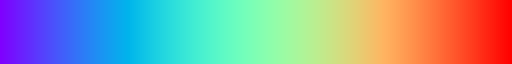

In [79]:
plt.cm.rainbow

In the above plot, the same color means that nodes are in the same community. However, we must take care with interpreting the colors. There are this many unique communities detected until each snapshot:

In [80]:
for layer in range(4):
    print(f'Number of unique communities detected until snapshot {layer+1}: {int(louvain_overlap.max()[layer]+1)}')

Number of unique communities detected until snapshot 1: 25
Number of unique communities detected until snapshot 2: 43
Number of unique communities detected until snapshot 3: 74
Number of unique communities detected until snapshot 4: 101


For the given parameter settings, the four networks depict 101 communities in total. Since we are using the `plt.cm.rainbow` colormap, the first one (with index 0) is shown in purple and the last one (with index 100) is shown in red. This means that snapshot 1 shows communities in 25 different colors from purple to light blue. Visual interpretation of the four clustered snapshots suggests that

1. a large part of the network does not exhibit larger structural change from snapshot 1 to 2, 
2. there is major change in network structure from snapshot 2 to 3 except for a purple community that exists since snapshot 1, and
3. there is sustained structural change from snapshot 3 to 4 except for a lime community.

This interpretation that the largest change is from snapshot 2 to 3 adds to our previous finding from modularity analysis that community bondaries are least defined in snapshot 3.

We find more evidence for structural change when we look at the number of new communities detected in each snapshot. If change and everything else was constant, we would expect to see 25 new communities at each transition. Instead, we see the largest number of new communities in snapshot 3:

In [81]:
print(f'Number of new communities detected in snapshot {0+1}: {int(louvain_overlap.max()[0]+1)}')
for layer in range(1, 4):
    print(f'Number of new communities detected in snapshot {layer+1}: {int(louvain_overlap.max()[layer]-louvain_overlap.max()[layer-1])}')

Number of new communities detected in snapshot 1: 25
Number of new communities detected in snapshot 2: 18
Number of new communities detected in snapshot 3: 31
Number of new communities detected in snapshot 4: 27


Finally, fluctuations in the average community size (the average number of nodes per community) also confirm that network structure is perturbed in snapshot 3:

In [82]:
for layer in range(4):
    n_layer = get_layer(G=MG_bt, layer=layer).number_of_nodes()
    n_communities = len(louvain_overlap[layer].unique()) - 1
    print(f'Average community size in snapshot {layer+1}: {round(n_layer/n_communities)}')

Average community size in snapshot 1: 8
Average community size in snapshot 2: 8
Average community size in snapshot 3: 6
Average community size in snapshot 4: 11


In sum, the face-to-face interaction network between 09:00 and 15:30 on day 2 is fairly modular and communities are fairly stable in terms of composition and size during snapshots 1 and 2. Modularity drops and communities change in quality and quantity in snapshot 3 before the network assumes a new and highly modular structure in snapshot 4. Guess what: snapshot 3 includes the lunch break!

## References

Borgatti, S. P. & Everett, M. G. (2006). "A graph-theoretic perspective on centrality." *Social Networks* 28:466–484. https://doi.org/10.1016/j.socnet.2005.11.005.

Brockmann, D. & Helbing, D. (2013). "The hidden geometry of complex, network-driven contagion phenomena." *Science* 342:1337–1342. https://doi.org/10.1126/science.1245200.

Lancichinetti, A. & Fortunato, S. (2012). "Consensus clustering in complex networks." *Scientific Reports* 2:336. https://doi.org/10.1038/srep00336.

McLevey, J. (2022). *Doing Computational Social Science: A Practical Introduction*. SAGE. https://us.sagepub.com/en-us/nam/doing-computational-social-science/book266031. *A rather complete introduction to the field with well-structured and insightful chapters also on centrality analysis and community detection. The [website](https://github.com/UWNETLAB/dcss_supplementary) offers the code used in the book.*

Menczer, F., Fortunato, S., & Davis, C. A. (2020). *A First Course in Network Science*. Cambridge University Press. https://doi.org/10.1017/9781108653947. *An introductory course with exercises that emerged from years of teaching network analysis using NetworkX. Written from the physicist's perspective, this book is focused on the network science paradigms of small-world networks, scale-free networks, community detection, and complex systems modeling. The [website](https://cambridgeuniversitypress.github.io/FirstCourseNetworkScience/) provides all code in the form of Jupyter Notebooks, data, and solutions to the exercises.*

<div class='alert alert-block alert-success'>
<b>Document information</b>

Contact and main author: Haiko Lietz & N. Gizem Bacaksizlar Turbic

Version date: 27 May 2023

License: ...
</div>

To do
- add resolution limit, Underfitting problem (Peixoto 300), definition by Menczer
- CAUTION BOX McL: "It also doesn’t guarantee that moving a node to a different community will not disconnect an existing community. In short, this introduces a weakness, identified by Traag et al. (2019), where..."
- BOX on Leiden, other algorithms, and SBM